In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import csv 
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 

In [42]:
df = pd.read_csv(r"C:\Users\Ayan.Sardar\Downloads\Fraud.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# Data Type Observation

In [43]:
df.shape

(6362620, 11)

In [44]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Brief description of the features present in the Data

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# Feature Exploration : Checking Correlations/ MultiCollinearity

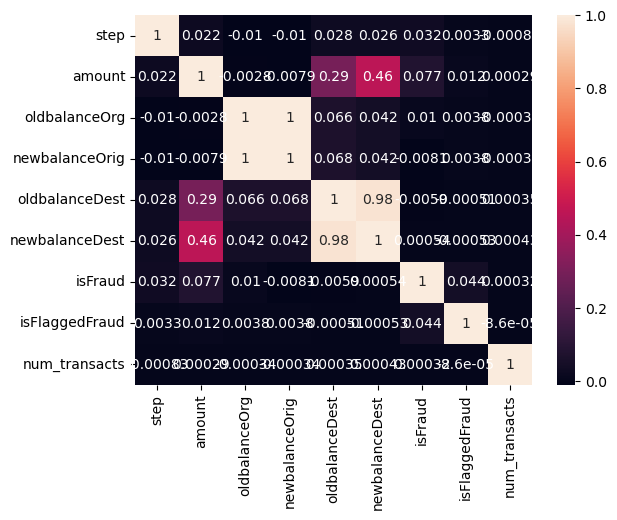

In [16]:
sns.heatmap(df.corr(), annot=True);

As seen from the correlation heatmap, 

'oldbalaceDest' and 'newbalanceDest' are highly multicollinear

'oldbalanceOrg' and 'newbalanceOrig' same

<AxesSubplot:>

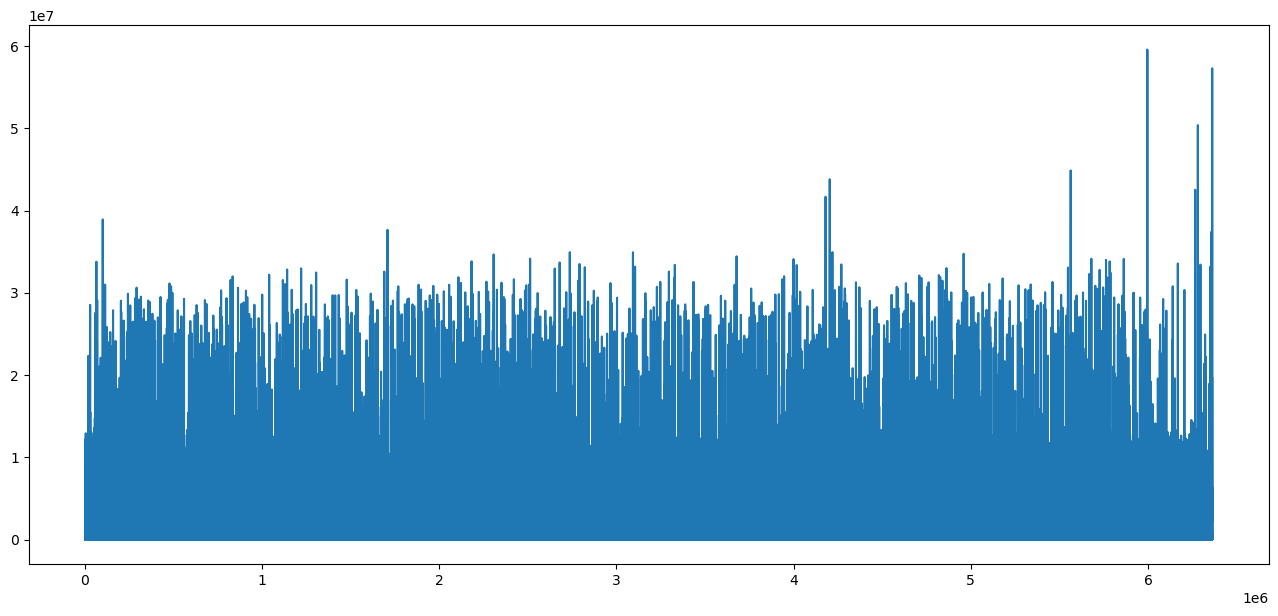

In [13]:
df['oldbalanceOrg'].plot(figsize=(16,7))

<AxesSubplot:>

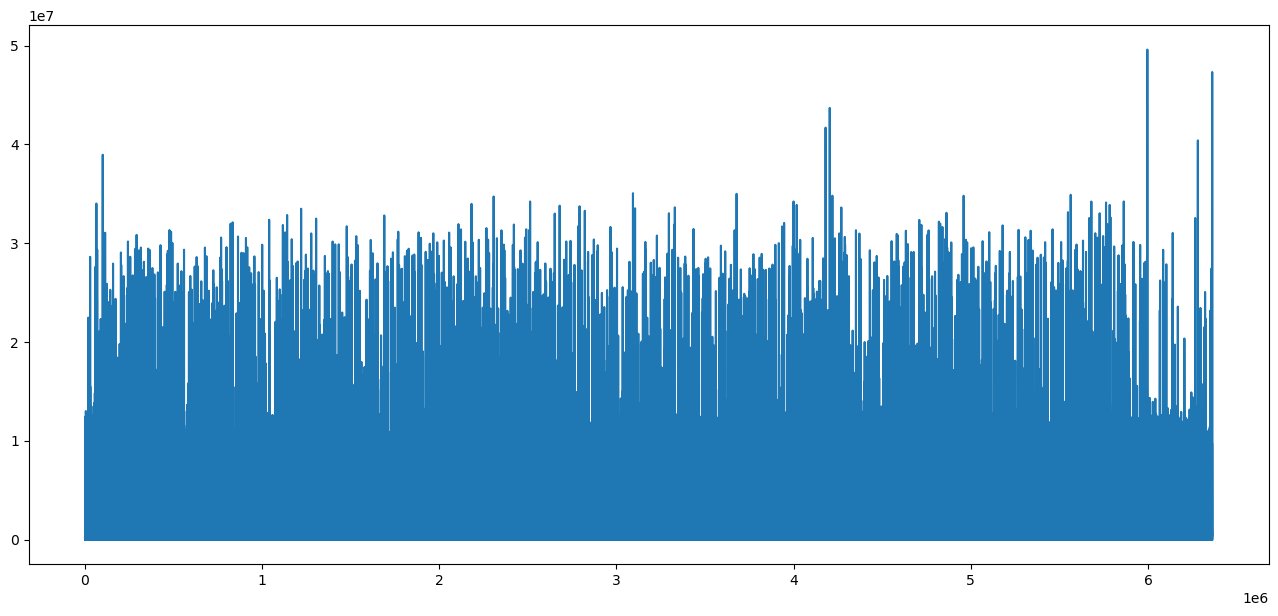

In [14]:
df['newbalanceOrig'].plot(figsize=(16,7))

In [15]:
df['oldbalanceOrg']

0           170136.00
1            21249.00
2              181.00
3              181.00
4            41554.00
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: oldbalanceOrg, Length: 6362620, dtype: float64

In [16]:
df['newbalanceOrig']

0          160296.36
1           19384.72
2               0.00
3               0.00
4           29885.86
             ...    
6362615         0.00
6362616         0.00
6362617         0.00
6362618         0.00
6362619         0.00
Name: newbalanceOrig, Length: 6362620, dtype: float64

So, since the above twoi columns are highly multicorelated and oldbalanceorig refers old balance before transaction
for person sending and newbalanceorig refers balance after transaction for person sending!

so we can add a new column 'amount_diff_sender' which is just the amount transacted

ie neww bal- old bal 

and since in the requirements of the task, retention of any old variables is not necessary

we can drop both and keep only 'amount_diff_sender'

In [45]:
df['amount_diff_sender']=df['newbalanceOrig']-df['oldbalanceOrg']

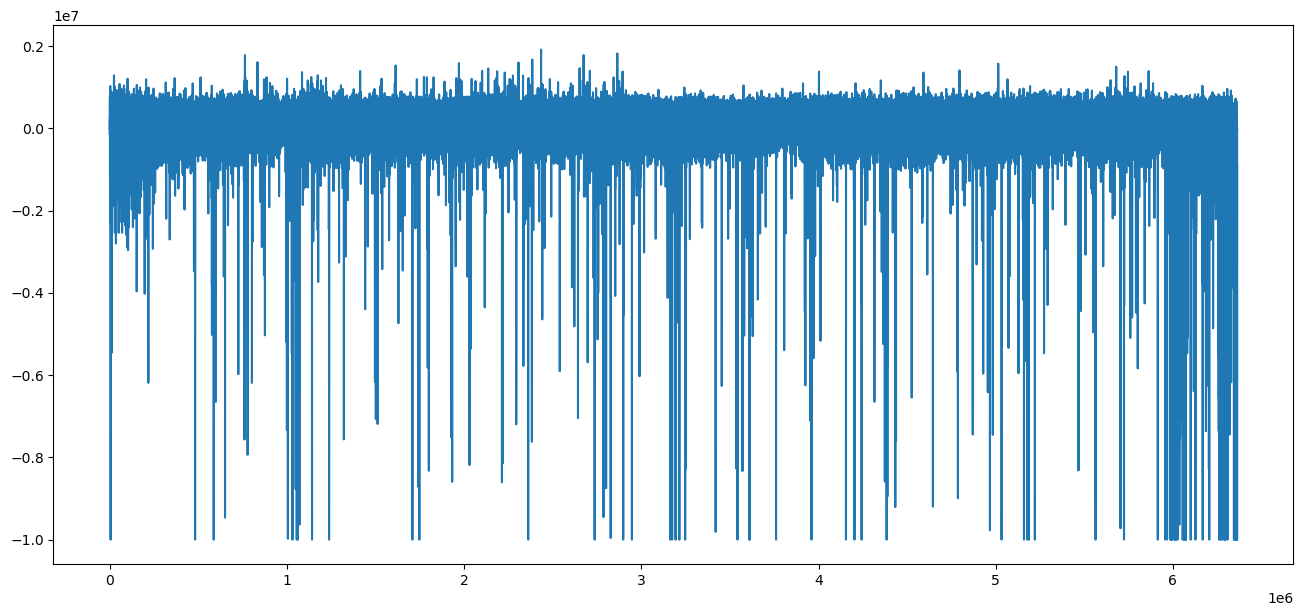

In [19]:
df['amount_diff_sender'].plot(figsize=(16,7));

as expected most transactions are debit transactions (barring few), thats why balance decreases

<AxesSubplot:>

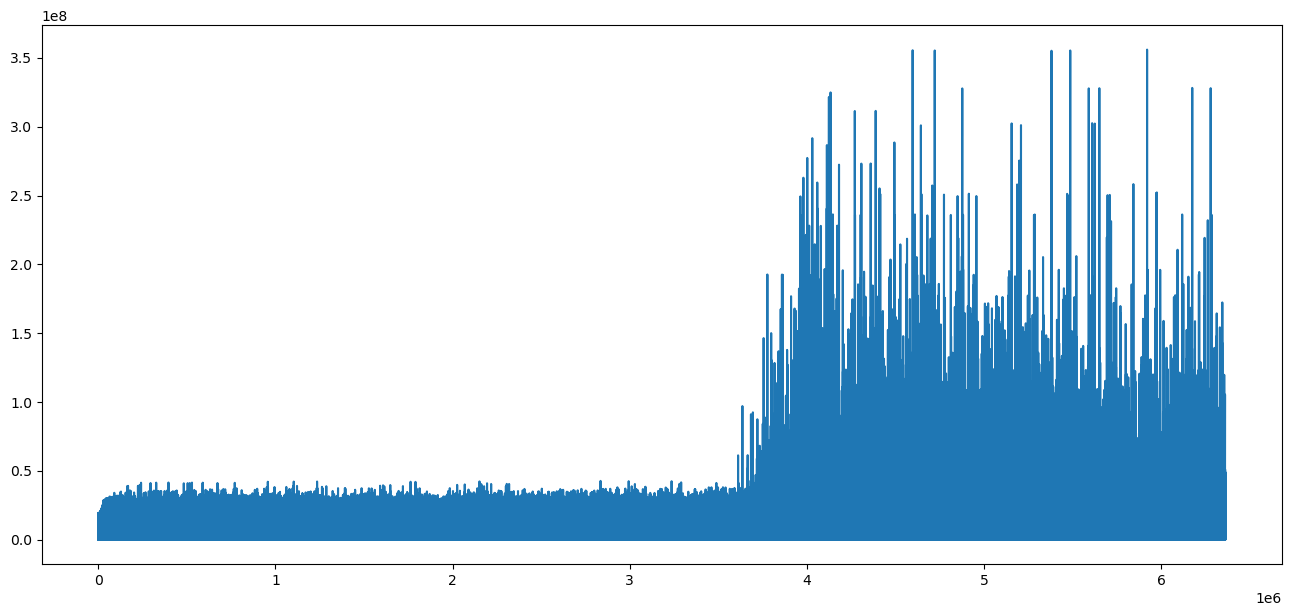

In [28]:
df['oldbalanceDest'].plot(figsize=(16,7))

<AxesSubplot:>

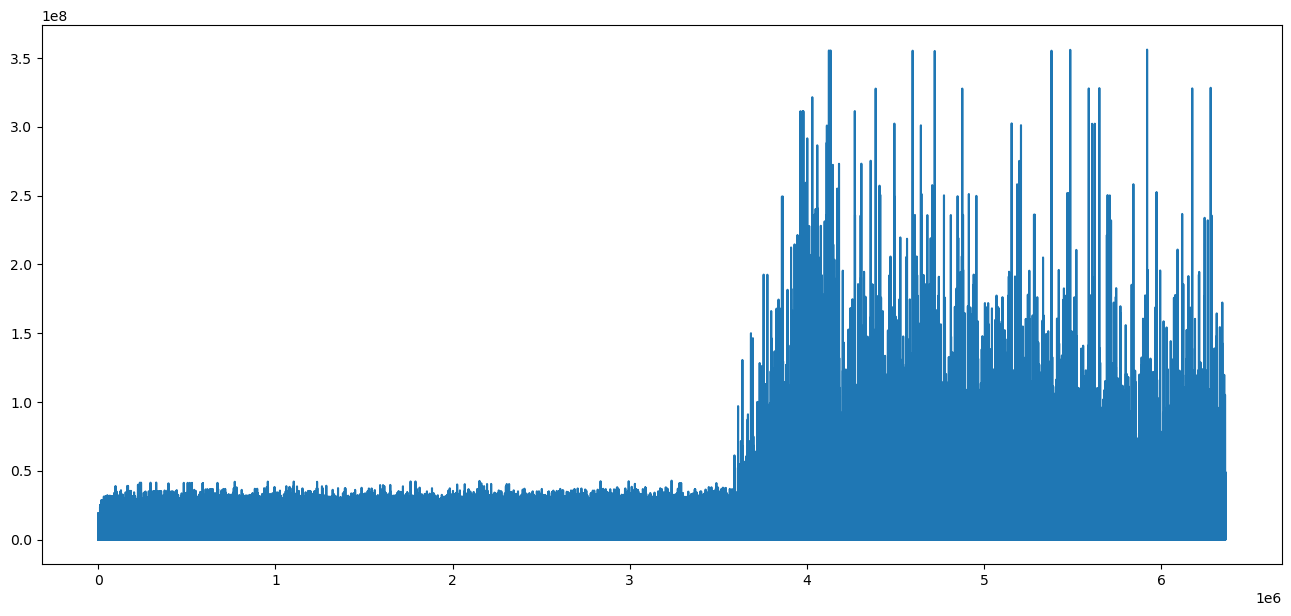

In [29]:
df['newbalanceDest'].plot(figsize=(16,7))

In [31]:
df['oldbalanceDest'].value_counts()

0.00           2704388
10000000.00        615
20000000.00        219
30000000.00         86
40000000.00         31
                ...   
967022.27            1
327279.67            1
2039554.04           1
587552.25            1
6510099.11           1
Name: oldbalanceDest, Length: 3614697, dtype: int64

In [32]:
df['newbalanceDest'].value_counts()

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
1254956.07          25
                ...   
188439.36            1
1347758.15           1
3878719.83           1
1605826.83           1
7360101.63           1
Name: newbalanceDest, Length: 3555499, dtype: int64

similar changes for Receiver Balance

In [46]:
df['amount_change_receiver']=df['newbalanceDest']-df['oldbalanceDest']

# Trying to observe correlations wrt newly formed features

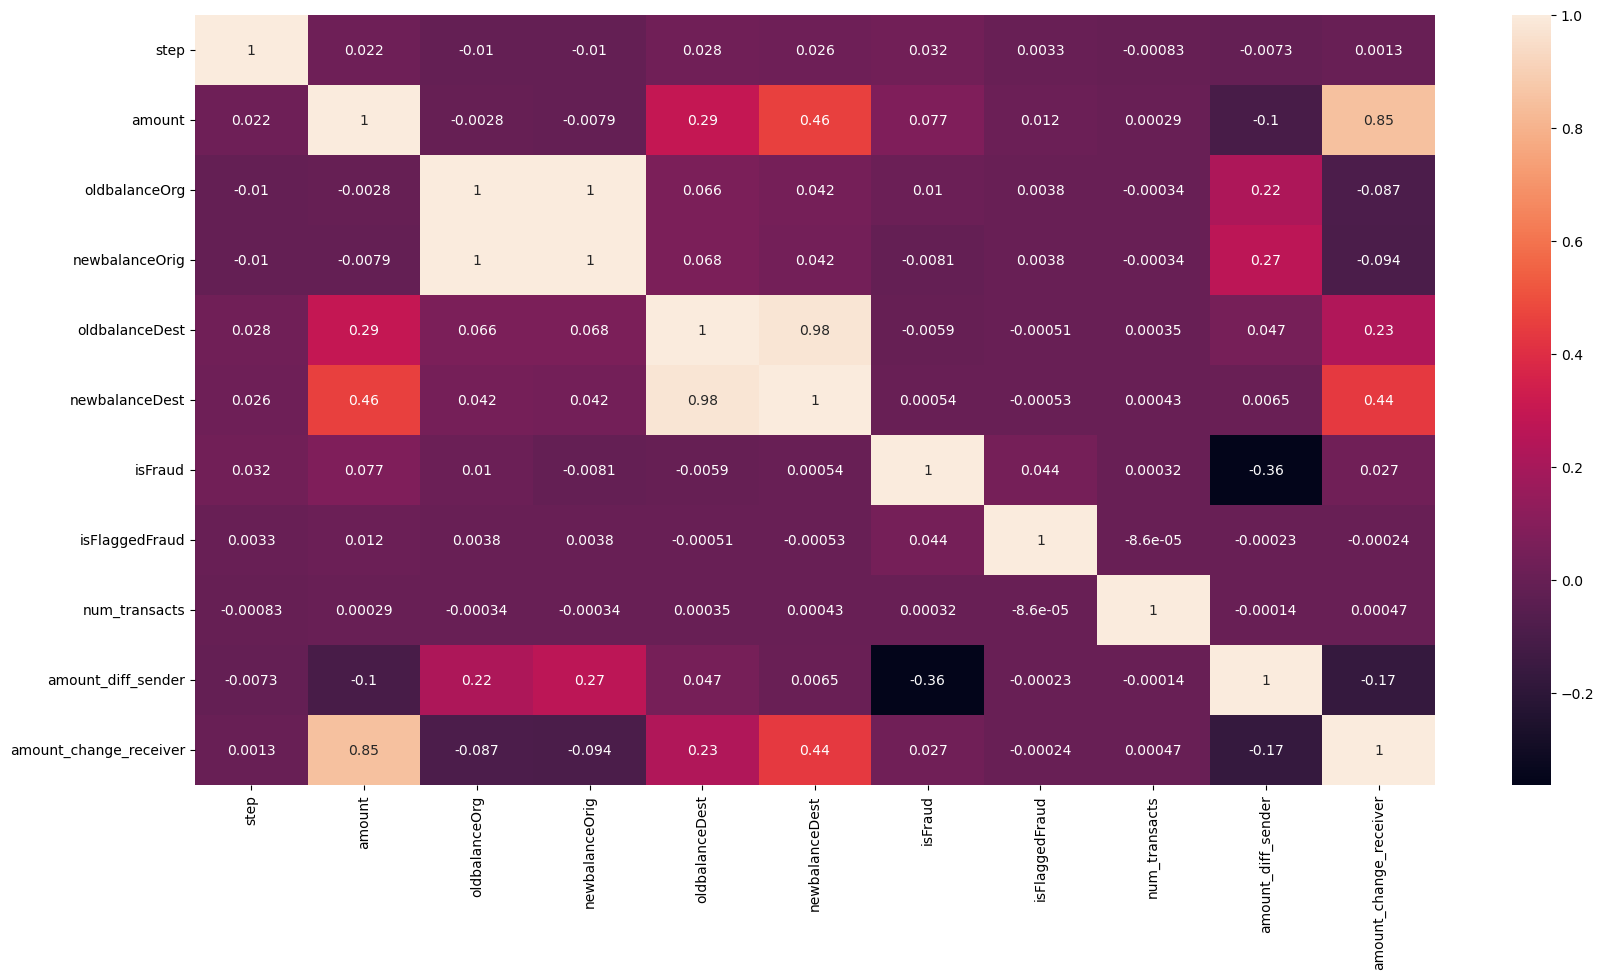

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

key notes:
1) Amount is highly correlated with amount_change_receiver so it indicated it is equivalent with each other. what i think, oviously some fee from bank bgets
deducted during transaction thats why maybe they are not exactly equal       

## AND 

so there are two types of transactions one with customer vs customer
one with merchant vs customer in namedest column

to summarise them we can either shorten to either 'customer' or 'merchant'
from their ids
those with starting 'M' is merchant and 'C' is customer
this will reduce lot of features when we will by dummy encoding them


In [47]:
def slash_initial(x):
    if x[0][0]=='C':
        return 'Customer'
    else:
        return 'Merchant'


df['nameDest']=df['nameDest'].apply(lambda x: slash_initial(x))

In [26]:
df['nameDest'].value_counts()

Customer    4211125
Merchant    2151495
Name: nameDest, dtype: int64

In [32]:
df['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

a separate column is added as 'num_transacts' which is the number of times a transaction was recorded by a particular
customer

In [48]:
num_transacts=df['nameOrig'].value_counts().values
ids=df['nameOrig'].value_counts().index

id_transacts_df=pd.DataFrame(list(zip(ids,num_transacts)), columns=['nameOrig','num_transacts'])
id_transacts_df['num_transacts'].value_counts()

1    6344009
2       9283
3         15
Name: num_transacts, dtype: int64

In [49]:
df=df.merge(id_transacts_df, on='nameOrig', how='left')

In [50]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_diff_sender,amount_change_receiver,num_transacts
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,Merchant,0.00,0.00,0,0,-9839.64,0.00,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,Merchant,0.00,0.00,0,0,-1864.28,0.00,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,Customer,0.00,0.00,1,0,-181.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,Customer,21182.00,0.00,1,0,-181.00,-21182.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,Merchant,0.00,0.00,0,0,-11668.14,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,Customer,0.00,339682.13,1,0,-339682.13,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,Customer,0.00,0.00,1,0,-6311409.28,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,Customer,68488.84,6379898.11,1,0,-6311409.28,6311409.27,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,Customer,0.00,0.00,1,0,-850002.52,0.00,1


In [51]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [52]:
crosstab = pd.crosstab(index=df['isFraud'], columns=df['type'])
print(crosstab)

type     CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER
isFraud                                             
0        1399284   2233384  41432  2151495    528812
1              0      4116      0        0      4097


In [53]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [54]:
crosstab = pd.crosstab(index=df['isFraud'], columns=df['isFlaggedFraud'])
print(crosstab)

isFlaggedFraud        0   1
isFraud                    
0               6354407   0
1                  8197  16


Since, all fraudulent transactions were flagged as fraud, the column 'isFalggedFraud' can be dropped

In [55]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_diff_sender,amount_change_receiver,num_transacts
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,Merchant,0.00,0.00,0,0,-9839.64,0.00,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,Merchant,0.00,0.00,0,0,-1864.28,0.00,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,Customer,0.00,0.00,1,0,-181.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,Customer,21182.00,0.00,1,0,-181.00,-21182.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,Merchant,0.00,0.00,0,0,-11668.14,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,Customer,0.00,339682.13,1,0,-339682.13,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,Customer,0.00,0.00,1,0,-6311409.28,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,Customer,68488.84,6379898.11,1,0,-6311409.28,6311409.27,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,Customer,0.00,0.00,1,0,-850002.52,0.00,1


In [62]:
df_chp=df

In [63]:
df_chp.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud','nameOrig','step'],axis=1,inplace=True)

In [64]:
df_chp['isFraud']=df_chp['isFraud'].astype('str')

In [65]:
X=df_chp.drop('isFraud',axis=1)
y=df_chp['isFraud']

In [66]:
X

,type,amount,nameDest,amount_diff_sender,amount_change_receiver,num_transacts
0,PAYMENT,9839.64,Merchant,-9839.64,0.00,1
1,PAYMENT,1864.28,Merchant,-1864.28,0.00,1
2,TRANSFER,181.00,Customer,-181.00,0.00,1
3,CASH_OUT,181.00,Customer,-181.00,-21182.00,1
4,PAYMENT,11668.14,Merchant,-11668.14,0.00,1
...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,Customer,-339682.13,339682.13,1
6362616,TRANSFER,6311409.28,Customer,-6311409.28,0.00,1
6362617,CASH_OUT,6311409.28,Customer,-6311409.28,6311409.27,1
6362618,TRANSFER,850002.52,Customer,-850002.52,0.00,1


In [67]:
X=pd.get_dummies(X)

In [68]:
X

,amount,amount_diff_sender,amount_change_receiver,num_transacts,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_Customer,nameDest_Merchant
0,9839.64,-9839.64,0.00,1,0,0,0,1,0,0,1
1,1864.28,-1864.28,0.00,1,0,0,0,1,0,0,1
2,181.00,-181.00,0.00,1,0,0,0,0,1,1,0
3,181.00,-181.00,-21182.00,1,0,1,0,0,0,1,0
4,11668.14,-11668.14,0.00,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,-339682.13,339682.13,1,0,1,0,0,0,1,0
6362616,6311409.28,-6311409.28,0.00,1,0,0,0,0,1,1,0
6362617,6311409.28,-6311409.28,6311409.27,1,0,1,0,0,0,1,0
6362618,850002.52,-850002.52,0.00,1,0,0,0,0,1,1,0


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [106]:
%%time
from sklearn.ensemble import RandomForestClassifier as rfc
rfc=rfc(n_estimators=100,n_jobs=-1)
rfc.fit(X_train,y_train)

Wall time: 9min 21s


RandomForestClassifier(n_jobs=-1)

In [107]:
y_pred=rfc.predict(X_test)

In [110]:
from sklearn.metrics import classification_report as cr

cr(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00   2096999\n           1       0.97      0.81      0.88      2666\n\n    accuracy                           1.00   2099665\n   macro avg       0.99      0.91      0.94   2099665\nweighted avg       1.00      1.00      1.00   2099665\n'

In [ ]:
i think we have some decent scores here

In [111]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.97      0.81      0.88      2666

    accuracy                           1.00   2099665
   macro avg       0.99      0.91      0.94   2099665
weighted avg       1.00      1.00      1.00   2099665



In [18]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

The model has most probably Overfit due to the huge class imbalance present inside the dataset.
Treating the Imbalance by:
    1) Random undersampling the majority class

In [19]:
8213+5*8213

49278

In [108]:
df_notfraud=df[df['isFraud']=='0']
df_isfraud=df[df['isFraud']=='1']

In [109]:
df_sampled=df_notfraud.sample(10000,random_state=42)
df_sampled.reset_index(drop=True,inplace=True)

#here a random sample of 10000 values was selected from the dataframe which contains onlythe majority class
# then merged it with the dataframe containing only minority class



In [110]:
df_new=pd.concat([df_sampled, df_isfraud])

In [111]:
df_new

,type,amount,nameDest,isFraud,amount_diff_sender,amount_change_receiver,num_transacts
0,CASH_OUT,183806.32,Customer,0,-19391.00,183806.32,1
1,PAYMENT,521.37,Merchant,0,0.00,0.00,1
2,PAYMENT,3478.18,Merchant,0,-3478.18,0.00,1
3,PAYMENT,1716.05,Merchant,0,-1716.04,0.00,1
4,CASH_IN,253129.93,Customer,0,253129.93,-253129.93,1
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,Customer,1,-339682.13,339682.13,1
6362616,TRANSFER,6311409.28,Customer,1,-6311409.28,0.00,1
6362617,CASH_OUT,6311409.28,Customer,1,-6311409.28,6311409.27,1
6362618,TRANSFER,850002.52,Customer,1,-850002.52,0.00,1


In [112]:
df_new=df_new.sample(frac=1)

In [113]:
df_new.reset_index(drop=True, inplace=True)

df_new['isFraud'].value_counts()

0    10000
1     8213
Name: isFraud, dtype: int64

In [114]:
df_new['isFraud']=df_new['isFraud'].astype('str')


X=df_new.drop('isFraud',axis=1)
y=df_new['isFraud']

X=pd.get_dummies(X)

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier as rfc
rfc=rfc(n_estimators=100,n_jobs=-1)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [120]:
y_pred=rfc.predict(X_test)

In [121]:
from sklearn.metrics import classification_report as cr

In [122]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3287
           1       0.95      0.96      0.96      2724

    accuracy                           0.96      6011
   macro avg       0.96      0.96      0.96      6011
weighted avg       0.96      0.96      0.96      6011



In [123]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rfc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)


In [124]:
np.mean(scores)

0.9608707052915402

CrossVal Scores are also equal to test scores, just as a check as to whether model is overfiiting or not we will also try 
roc-auc 

In [125]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9618961270916846

roc_auc score, cross_val and recall scores are almost equal so we have plenty of checks here to see whether our model has overfitted or not.


In [126]:
from sklearn.linear_model import LogisticRegression as logres
logres=logres()
logres.fit(X_train,y_train)
y_pred=logres.predict(X_test)

print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      3287
           1       0.95      0.86      0.90      2724

    accuracy                           0.92      6011
   macro avg       0.92      0.91      0.92      6011
weighted avg       0.92      0.92      0.92      6011



5. What are the key factors that predict fraudulent customer? 

In [127]:
import plotly.express as px

fig=px.bar(x=X.columns, y=rfc.feature_importances_)
fig.show()